In [21]:
%matplotlib inline

In [22]:
import os
import numpy as np
from skimage import io
from skimage.feature import match_template
import matplotlib.pyplot as plt


In [23]:
# Update Template File Locations here

curb_ramp_file = '/Volumes/Extreme SSD/SandboxDataCrops/CurbRamp/-G/-gZ95hldubZCRcWFDQE7YQ_CurbRamp_2673.1532184829025_1315.6923076923076.jpg'
no_curb_ramp_file = '/Volumes/Extreme SSD/SandboxDataCrops/NoCurbRamp/-E/-eQITx7k8k-OwLFFzmNB0A_NoCurbRamp_579.1716312767094_1264.3076923076924.jpg'
obstacle_file = '/Volumes/Extreme SSD/SandboxDataCrops/Obstacle/-K/-Kyz_xRUsH6_XsesY3XChw_Obstacle_3032.9316105769267_1416.6153846153845.jpg'
surface_problem_file = '/Volumes/Extreme SSD/SandboxDataCrops/SurfaceProblem/1G/1GyKnDKyNVKs6-HzUICoeA_SurfaceProblem_2637.690651709399_1243.6923076923076.jpg'

# Reading the images and converting to one channel image

curb_ramp = io.imread(curb_ramp_file)[:,:,2]
no_curb_ramp = io.imread(no_curb_ramp_file)[:,:,2]
obstacle = io.imread(obstacle_file)[:,:,2]
surface_problem = io.imread(surface_problem_file)[:,:,2]


In [24]:
# This cell adds the file locations of the rescaled pano images to a np array

pano_file_directory = "/Volumes/Extreme SSD/Sandbox Data/"
pano_file_list = []

for dir_name, sub_dir_list, file_list in os.walk(pano_file_directory):
    for file_name in file_list:
        if file_name[-4:] == ".jpg" and len(file_name) > 20:
            pano_file_list.append(file_name)

pano_file_list = np.array(pano_file_list)


In [25]:
def pano_path_finder(pano_name):
    path = os.path.join(pano_file_directory, pano_name[:2], pano_name)
    return path

def pano_template_checker(pano_path, plot_output = False):
    pano = io.imread(pano_path)
    pano = pano[:,:,2]
    
    result = {}
    
    result['curb_ramp_result'] = match_template(pano, curb_ramp)
    result['no_curb_ramp_result'] = match_template(pano, no_curb_ramp)
    result['obstacle_result'] = match_template(pano, obstacle)
    result['surface_problem_result'] = match_template(pano, surface_problem)
    
    plot_results(result, pano)
    
def plot_results(result, pano):
    fig = plt.figure()
    plot = plt.subplot(1,1,1)
    
    plot.imshow(pano)
    for label_name, label_result in result.items():
        x_pred, y_pred = np.unravel_index(np.argmax(label_result), label_result.shape)[::-1]
        pred_region = plt.Rectangle((x_pred, y_pred), 246, 246, edgecolor ='r', facecolor ='none' )
        plot.add_patch(pred_region)
        x_label_title = x_pred
        y_label_title = y_pred - 125
        plt.text(x_label_title, y_label_title, label_name, color = 'w', ha = 'center', va ='center')
    plt.show()

In [26]:
# This cell matches the template and adds the image to a array
for pano in pano_file_list:
    pass

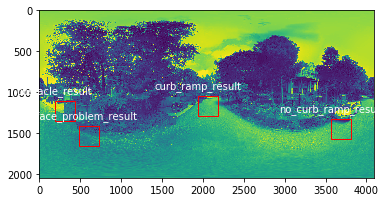

6jrfO1RNGqlBT3f2GqCz1Q.jpg


In [27]:
file_index = 8896

pano_template_checker(pano_path_finder(pano_file_list[file_index]))
print(pano_file_list[file_index])

In [28]:
# Label Validation 

